In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cvxpy as cp

[-0.07761951]
[ 0.21788947 -0.06303854]
[ 1.72889071 -0.85143835  0.0931302 ]
[ 1.76613988e+00 -8.86011702e-01  1.02587945e-01 -7.92002664e-04]
[ 1.20079227 -0.06097631 -0.28633008  0.07270041 -0.00482658]
[ 1.62059935e+00 -9.36639387e-01  3.30014078e-01 -1.20459115e-01
  2.29640854e-02 -1.49724421e-03]
[ 2.52047750e+00 -3.47341139e+00  2.82720159e+00 -1.27902071e+00
  2.98459536e-01 -3.39754659e-02  1.50386373e-03]
[ 3.50373718e+00 -7.09476940e+00  7.54958547e+00 -4.26532478e+00
  1.32170903e+00 -2.28254985e-01  2.07254290e-02 -7.73104935e-04]
[ 3.53935387e+00 -7.26137866e+00  7.82752330e+00 -4.49456673e+00
  1.42772455e+00 -2.57072635e-01  2.52954060e-02 -1.16426140e-03
  1.39591442e-05]
[ 3.21288880e+00 -5.39506710e+00  3.99766597e+00 -5.50031591e-01
 -9.04612387e-01  5.84056271e-01 -1.62853577e-01  2.43173656e-02
 -1.89964609e-03  6.11497331e-05]
[ 2.51588403e+00 -6.22051194e-01 -7.83318843e+00  1.43462186e+01
 -1.18537908e+01  5.61399968e+00 -1.65057395e+00  3.07589669e-01
 -3.544

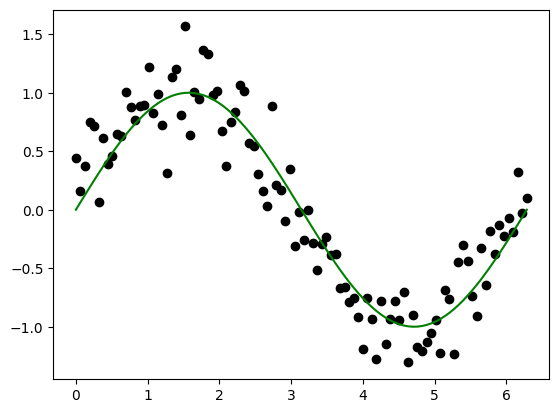

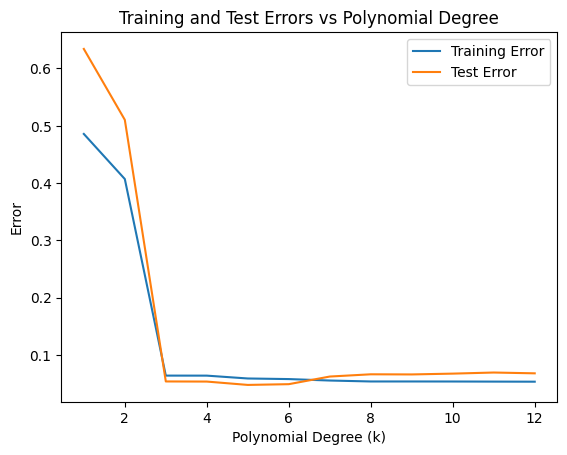

In [22]:
# Generate the data set, containing 100 instances
np.random.seed(seed=0)
data_size = 100
data_x = np.linspace(0,2*np.pi,num=data_size)
data_y = np.apply_along_axis(lambda x: np.sin(x), 0, data_x) + 0.25 * np.random.normal(size=data_x.shape)

# A figure of the underlying generator function and the data points
plt.scatter(data_x, data_y, color="black")
xlist = np.linspace(0,2*np.pi,num=100)
plt.plot(xlist, np.apply_along_axis(lambda x: np.sin(x), 0, xlist), color="green")

# Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0)

train_errors = []
test_errors = []

for k in range(1, 13):
    # create polynomial features
    X_train_poly = np.column_stack([X_train**i for i in range(1, k+1)])
    X_test_poly = np.column_stack([X_test**i for i in range(1, k+1)])
    
    # define variables and objective function
    w = cp.Variable(k)
    loss = cp.sum_squares(X_train_poly @ w - y_train)
    obj = cp.Minimize(loss)
    prob = cp.Problem(obj)
    
    prob.solve(solver=cp.SCS)
    print(w.value)
    
    y_train_pred = X_train_poly @ w.value
    y_test_pred = X_test_poly @ w.value
    
    train_error = np.sum((y_train_pred - y_train)**2) / len(y_train)
    test_error = np.sum((y_test_pred - y_test)**2) / len(y_test)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    

plt.figure()
plt.plot(range(1, 13), train_errors, label='Training Error')
plt.plot(range(1, 13), test_errors, label='Test Error')
plt.xlabel('Polynomial Degree (k)')
plt.ylabel('Error')
plt.title('Training and Test Errors vs Polynomial Degree')
plt.legend()
plt.show()

In [24]:
l1_lambda = 1.0  # lambda value
k = 12  # polynomial degree

X_train_poly = np.column_stack([X_train**i for i in range(1, k+1)])

# define optimization variables and objective function
w = cp.Variable(k)
loss = cp.sum_squares(X_train_poly @ w - y_train) + l1_lambda * cp.norm(w, 1)
obj = cp.Minimize(loss)
prob = cp.Problem(obj)

prob.solve(solver=cp.SCS)

# calculate predictions and test error
X_test_poly = np.column_stack([X_test**i for i in range(1, k+1)])
y_test_pred = X_test_poly @ w.value
test_error = np.sum((y_test_pred - y_test)**2) / len(y_test)

# analyze sparsity of the optimal solution
num_nonzero_elements = np.sum(np.abs(w.value) > 1e-5)

print("Test Error with L1-Regularization:", test_error)
print("Number of Nonzero Elements in Optimal Solution:", num_nonzero_elements)

Test Error with L1-Regularization: 0.059573112768676904
Number of Nonzero Elements in Optimal Solution: 7
